# This IPython notebook is a document for deriving monthly proportion of precipitation for different trajectory cluster during GDAS-covered period
    by Xia et al.

Activate packages

In [1]:
import pysplit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({"mathtext.default":"regular"})

Wrap trajectories into trajgroups and it takes several minutes to run

In [2]:
# This step takes ~ 4min
trajgroup_0500 = pysplit.make_trajectorygroup(r"C:/trajectories/PA_GDAS_new/0500m/*PA*0500*")
print("number of 500-m trajectories:",trajgroup_0500.trajcount)

trajgroup_1000 = pysplit.make_trajectorygroup(r"C:/trajectories/PA_GDAS_new/1000m/*PA*1000*")
print("number of 1000-m trajectories:",trajgroup_1000.trajcount)
# one trajectory was manually deleted because file was incomplete

trajgroup_1500 = pysplit.make_trajectorygroup(r"C:/trajectories/PA_GDAS_new/1500m/*PA*1500*")
print("number of 1500-m trajectories:",trajgroup_1500.trajcount)

trajgroup_2000 = pysplit.make_trajectorygroup(r"C:/trajectories/PA_GDAS_new/2000m/*PA*2000*")
print("number of 2000-m trajectories:",trajgroup_2000.trajcount)

number of 500-m trajectories: 3341
number of 1000-m trajectories: 3340
number of 1500-m trajectories: 3341
number of 2000-m trajectories: 3341


Define a function to cluster trajectory into four distal clusters clusters
* If trajectory cluster is identified, then trajectory is put into list (e.g., cluster_dE) of that cluster.
* The identifier of trajectory cluster is also put into a list (e.g., cluster_list_distal) as a sequence for following analysis

In [3]:
def cluster_traj_distal(trajgroup):
    cluster_dE,cluster_dN,cluster_dW,cluster_dS = [],[],[],[]
    cluster_list_distal = []
    for traj in trajgroup:
        cluster = "default"
        t = 0
        for step in range(0,120):
            if traj.data.geometry.loc[t].y < traj.data.geometry.loc[t].x + 18:
                if traj.data.geometry.loc[t].y > -2.5 * traj.data.geometry.loc[t].x - 223.5:
                    if traj.data.geometry.loc[t].y > -0.5 * traj.data.geometry.loc[t].x -87.5:
                        cluster = "dE"
                        cluster_dE.append(traj)
            if traj.data.geometry.loc[t].y > -48:
                if traj.data.geometry.loc[t].y > -7 * traj.data.geometry.loc[t].x - 559:
                    if traj.data.geometry.loc[t].y > traj.data.geometry.loc[t].x + 18:
                        cluster = "dN"
                        cluster_dN.append(traj)
            if traj.data.geometry.loc[t].y < -7 * traj.data.geometry.loc[t].x - 559:
                cluster = "dW"
                cluster_dW.append(traj)
            if traj.data.geometry.loc[t].y < -55:
                if traj.data.geometry.loc[t].y > -7 * traj.data.geometry.loc[t].x - 559:
                    if traj.data.geometry.loc[t].y < -0.5 * traj.data.geometry.loc[t].x - 87.5:
                        cluster = "dS"
                        cluster_dS.append(traj)
            if cluster != "default":
                break
            t = t - 1
        if cluster == "default":
            print("no boundary crossed on yr mn dy hr:",traj.data.DateTime.dt.year[0],traj.data.DateTime.dt.month[0],\
                  traj.data.DateTime.dt.day[0],traj.data.DateTime.dt.hour[0])
            # check to see if any trajectory did not cross any boundary
        cluster_list_distal.append(cluster)
    return cluster_list_distal,cluster_dE,cluster_dN,cluster_dW,cluster_dS

cluster_list_distal_0500,cluster_dE_0500,cluster_dN_0500,cluster_dW_0500,cluster_dS_0500 = cluster_traj_distal(trajgroup_0500)
cluster_list_distal_1000,cluster_dE_1000,cluster_dN_1000,cluster_dW_1000,cluster_dS_1000 = cluster_traj_distal(trajgroup_1000)
cluster_list_distal_1500,cluster_dE_1500,cluster_dN_1500,cluster_dW_1500,cluster_dS_1500 = cluster_traj_distal(trajgroup_1500)
cluster_list_distal_2000,cluster_dE_2000,cluster_dN_2000,cluster_dW_2000,cluster_dS_2000 = cluster_traj_distal(trajgroup_2000)

Takes RH at t=0 into lists

In [179]:
RH_list=[]
for i in range(trajgroup_0500.trajcount):
    RH_list.append("0500")

for i in range(trajgroup_0500.trajcount):
    # have to deal with the missing trajectory at 1000 m
    # This trajectory # is 2828
    if i <= 2827:
        if trajgroup_1000[i].data.Relative_Humidity[0]>=max(trajgroup_0500[i].data.Relative_Humidity[0],
                                                            trajgroup_1500[i].data.Relative_Humidity[0],
                                                            trajgroup_2000[i].data.Relative_Humidity[0]):
            RH_list[i]="1000"
        if trajgroup_1500[i].data.Relative_Humidity[0]>=max(trajgroup_0500[i].data.Relative_Humidity[0],
                                                            trajgroup_1000[i].data.Relative_Humidity[0],
                                                            trajgroup_2000[i].data.Relative_Humidity[0]):
            RH_list[i]="1500"
        if trajgroup_2000[i].data.Relative_Humidity[0]>=max(trajgroup_0500[i].data.Relative_Humidity[0],
                                                            trajgroup_1000[i].data.Relative_Humidity[0],
                                                            trajgroup_1500[i].data.Relative_Humidity[0]):
            RH_list[i]="2000"
    if i >= 2829:
        if trajgroup_1000[i-1].data.Relative_Humidity[0]>=max(trajgroup_0500[i].data.Relative_Humidity[0],
                                                              trajgroup_1500[i].data.Relative_Humidity[0],
                                                              trajgroup_2000[i].data.Relative_Humidity[0]):
            RH_list[i]="1000"
        if trajgroup_1500[i].data.Relative_Humidity[0]>=max(trajgroup_0500[i].data.Relative_Humidity[0],
                                                            trajgroup_1000[i-1].data.Relative_Humidity[0],
                                                            trajgroup_2000[i].data.Relative_Humidity[0]):
            RH_list[i]="1500"
        if trajgroup_2000[i].data.Relative_Humidity[0]>=max(trajgroup_0500[i].data.Relative_Humidity[0],
                                                            trajgroup_1000[i-1].data.Relative_Humidity[0],
                                                            trajgroup_1500[i].data.Relative_Humidity[0]):
            RH_list[i]="2000"
# check the frequency
RH_list.count("0500"),RH_list.count("1000"),RH_list.count("1500"),RH_list.count("2000")

(522, 861, 808, 1150)

Calculate monthly dE, dN, dW, and dS

Derive a list of cluster identifier in cluster_list

In [23]:
df_precipitation = pd.read_excel("Airport data/Punta Arenas AP precipitation.xlsx",sheet_name="6hour")
df_precip = df_precipitation[df_precipitation["6hr precipitation"] > 0].reset_index(drop = True)
cluster_list=[]
def calculate_monthly():
    year,month,day,hour = [],[],[],[]
    for traj in trajgroup_0500:
        year.append(traj.data.DateTime.dt.year[0])
        month.append(traj.data.DateTime.dt.month[0])
        day.append(traj.data.DateTime.dt.day[0])
        hour.append(traj.data.DateTime.dt.hour[0])
    df = pd.DataFrame(list(zip(year,month,day,hour)),columns = ["year","month","day","hour"])
    df = pd.merge(df, df_precip)
    year,month = [],[]
    dE_ratio,dN_ratio,dW_ratio,dS_ratio = [],[],[],[]
    for yr in range(2005,2018):
        for mn in range(1,13):
            dE,dN,dW,dS,monthly = 0,0,0,0,0
            for i in range(len(df)):
                if df["year"][i] == yr and df["month"][i] == mn:
                    if df["day"][i] != 1 or df["hour"][i] != 0:
                        # here day 0 hour 00 precipitation for each month should be considered as the last month's precipitation
                        if RH_list[i] == "0500":
                            if cluster_list_distal_0500[i] == "dE":
                                dE = dE + df["6hr precipitation"][i]
                                cluster_list.append("dE")
                            if cluster_list_distal_0500[i] == "dN":
                                dN = dN + df["6hr precipitation"][i]
                                cluster_list.append("dN")
                            if cluster_list_distal_0500[i] == "dW":
                                dW = dW + df["6hr precipitation"][i]
                                cluster_list.append("dW")
                            if cluster_list_distal_0500[i] == "dS":
                                dS = dS + df["6hr precipitation"][i]
                                cluster_list.append("dS")
                            monthly = monthly + df["6hr precipitation"][i]
                        if RH_list[i] == "1000":
                            if cluster_list_distal_1000[i] == "dE":
                                dE = dE + df["6hr precipitation"][i]
                                cluster_list.append("dE")
                            if cluster_list_distal_1000[i] == "dN":
                                dN = dN + df["6hr precipitation"][i]
                                cluster_list.append("dN")
                            if cluster_list_distal_1000[i] == "dW":
                                dW = dW + df["6hr precipitation"][i]
                                cluster_list.append("dW")
                            if cluster_list_distal_1000[i] == "dS":
                                dS = dS + df["6hr precipitation"][i]
                                cluster_list.append("dS")
                            monthly = monthly + df["6hr precipitation"][i]
                        if RH_list[i] == "1500":
                            if cluster_list_distal_1500[i] == "dE":
                                dE = dE + df["6hr precipitation"][i]
                                cluster_list.append("dE")
                            if cluster_list_distal_1500[i] == "dN":
                                dN = dN + df["6hr precipitation"][i]
                                cluster_list.append("dN")
                            if cluster_list_distal_1500[i] == "dW":
                                dW = dW + df["6hr precipitation"][i]
                                cluster_list.append("dW")
                            if cluster_list_distal_1500[i] == "dS":
                                dS = dS + df["6hr precipitation"][i]
                                cluster_list.append("dS")
                            monthly = monthly + df["6hr precipitation"][i]
                        if RH_list[i] == "2000":
                            if cluster_list_distal_2000[i] == "dE":
                                dE = dE + df["6hr precipitation"][i]
                                cluster_list.append("dE")
                            if cluster_list_distal_2000[i] == "dN":
                                dN = dN + df["6hr precipitation"][i]
                                cluster_list.append("dN")
                            if cluster_list_distal_2000[i] == "dW":
                                dW = dW + df["6hr precipitation"][i]
                                cluster_list.append("dW")
                            if cluster_list_distal_2000[i] == "dS":
                                dS = dS + df["6hr precipitation"][i]
                                cluster_list.append("dS")
                            monthly = monthly + df["6hr precipitation"][i]
                    if i != len(df)-1:
                        if df["day"][i+1] == 1 and df["hour"][i+1] == 0:
                            # here we add up day 0 hour 00 precipitation from next month
                            if RH_list[i] == "0500":
                                if cluster_list_distal_0500[i] == "dE":
                                    dE = dE + df["6hr precipitation"][i]
                                    cluster_list.append("dE")
                                if cluster_list_distal_0500[i] == "dN":
                                    dN = dN + df["6hr precipitation"][i]
                                    cluster_list.append("dN")
                                if cluster_list_distal_0500[i] == "dW":
                                    dW = dW + df["6hr precipitation"][i]
                                    cluster_list.append("dW")
                                if cluster_list_distal_0500[i] == "dS":
                                    dS = dS + df["6hr precipitation"][i]
                                    cluster_list.append("dS")
                                monthly = monthly + df["6hr precipitation"][i]
                            if RH_list[i] == "1000":
                                if cluster_list_distal_1000[i] == "dE":
                                    dE = dE + df["6hr precipitation"][i]
                                    cluster_list.append("dE")
                                if cluster_list_distal_1000[i] == "dN":
                                    dN = dN + df["6hr precipitation"][i]
                                    cluster_list.append("dN")
                                if cluster_list_distal_1000[i] == "dW":
                                    dW = dW + df["6hr precipitation"][i]
                                    cluster_list.append("dW")
                                if cluster_list_distal_1000[i] == "dS":
                                    dS = dS + df["6hr precipitation"][i]
                                    cluster_list.append("dS")
                                monthly = monthly + df["6hr precipitation"][i]
                            if RH_list[i] == "1500":
                                if cluster_list_distal_1500[i] == "dE":
                                    dE = dE + df["6hr precipitation"][i]
                                    cluster_list.append("dE")
                                if cluster_list_distal_1500[i] == "dN":
                                    dN = dN + df["6hr precipitation"][i]
                                    cluster_list.append("dN")
                                if cluster_list_distal_1500[i] == "dW":
                                    dW = dW + df["6hr precipitation"][i]
                                    cluster_list.append("dW")
                                if cluster_list_distal_1500[i] == "dS":
                                    dS = dS + df["6hr precipitation"][i]
                                    cluster_list.append("dS")
                                monthly = monthly + df["6hr precipitation"][i]
                            if RH_list[i] == "2000":
                                if cluster_list_distal_2000[i] == "dE":
                                    dE = dE + df["6hr precipitation"][i]
                                    cluster_list.append("dE")
                                if cluster_list_distal_2000[i] == "dN":
                                    dN = dN + df["6hr precipitation"][i]
                                    cluster_list.append("dN")
                                if cluster_list_distal_2000[i] == "dW":
                                    dW = dW + df["6hr precipitation"][i]
                                    cluster_list.append("dW")
                                if cluster_list_distal_2000[i] == "dS":
                                    dS = dS + df["6hr precipitation"][i]
                                    cluster_list.append("dS")
                                monthly = monthly + df["6hr precipitation"][i]
            year.append(yr)
            month.append(mn)
            dE_ratio.append(dE/monthly*100)
            dN_ratio.append(dN/monthly*100)
            dW_ratio.append(dW/monthly*100)
            dS_ratio.append(dS/monthly*100)
    return pd.DataFrame(list(zip(year,month,dE_ratio,dN_ratio,dW_ratio,dS_ratio)),
                        columns = ["year","month","dE%","dN%","dW%","dS%"])
df_results = calculate_monthly()

Visualize results

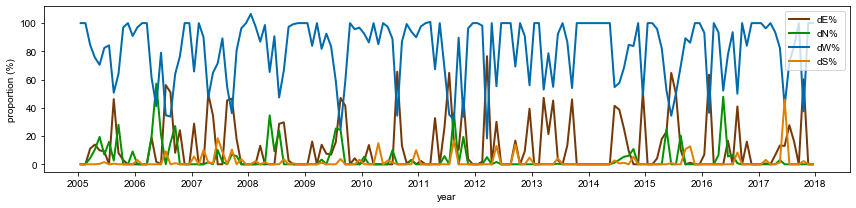

In [7]:
plt.figure(figsize=(12,3))
def plot_time_series(data):
    plt.plot(data["year"]+(data["month"]*2-1)/24,data["dE%"],linewidth=2,color="#753909")
    plt.plot(data["year"]+(data["month"]*2-1)/24,data["dN%"],linewidth=2,color="#009300")
    plt.plot(data["year"]+(data["month"]*2-1)/24,data["dW%"],linewidth=2,color="#006BAC")
    plt.plot(data["year"]+(data["month"]*2-1)/24,data["dS%"],linewidth=2,color="#E18000")
    plt.xticks(range(2005, 2019, 1))
    plt.xlabel("year")
    plt.ylabel("proportion (%)")
    legend=plt.legend(("dE%","dN%","dW%","dS%"),loc=1)
plot_time_series(df_results)
plt.tight_layout()

Plot GNIP data versus GHCN temperature
* GNIP data are filtered and only d18O data ranging from -17 to -3 permil (d-excess >= -10) were used.
* The regression line was used to calculate d18O residual.

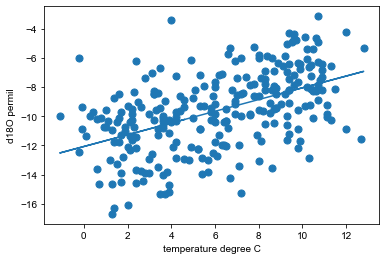

In [8]:
df_GNIP = pd.read_excel("GNIP.xlsx",sheet_name="Sheet1")
df_GNIP = df_GNIP[(df_GNIP["d18O"]<=-3) & (df_GNIP["d-excess"]>=-10) & (df_GNIP["d18O"]>=-17)].reset_index()
plt.scatter(df_GNIP["GHCN temp"],df_GNIP["d18O"],s=50)
# one GHCN temperature observation gap was filled by GNIP temperature data 
plt.xlabel("temperature degree C")
plt.ylabel("d18O permil")
m, b = np.polyfit(df_GNIP["GHCN temp"],df_GNIP["d18O"], 1)
plt.plot(df_GNIP["GHCN temp"],m*df_GNIP["GHCN temp"]+b)

Calculate d18O residual

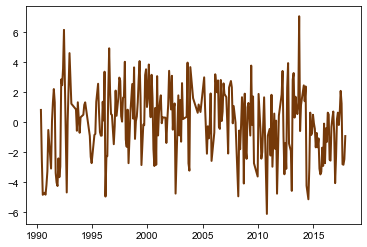

In [9]:
d18O_residual = []
for i in range(0,len(df_GNIP.d18O)):
    d18O_residual.append(df_GNIP["d18O"][i]-(m*df_GNIP["GHCN temp"][i]+b))
df_GNIP["d18O residual"] = d18O_residual
plt.plot(df_GNIP["year"]+(df_GNIP["month"]*2-1)/24,df_GNIP["d18O residual"],linewidth=2,color="#753909")

Correlation analysis

In [168]:
df = pd.merge(df_GNIP, df_results)
df.drop(df.index[[57,58,59,67]], inplace=True)
# delete months when many data gaps occur
df_winter=df[(df["month"]>=6) & (df["month"]<=8)]
df_spring=df[(df["month"]>=9) & (df["month"]<=11)]
df_summer=df[(df["month"]>=12) | (df["month"]<=2)]
df_autumn=df[(df["month"]>=3) & (df["month"]<=5)]
from scipy.stats import pearsonr
def corr(season,df,data,cluster):
    r,p=pearsonr(df[data],df[cluster])
    if p>=0.1:
        print(season,data,cluster,"%.3f" % r,"%.3f" % p)
    else:
        print(season,data,cluster,"%.3f" % r,"%.3f" % p,"%.3f" % np.polyfit(df[cluster],df[data],1)[0])

for df,season in zip([df_winter,df_spring,df_summer,df_autumn],["winter","spring","summer","autumn"]):
    for cluster in ["dE%","dN%","dW%","dS%"]:
        corr(season,df,"d18O residual",cluster)
for df,season in zip([df_winter,df_spring,df_summer,df_autumn],["winter","spring","summer","autumn"]):
    for cluster in ["dE%","dN%","dW%","dS%"]:
        corr(season,df,"d-excess",cluster)

winter d18O residual dE% -0.138 0.428
winter d18O residual dN% 0.031 0.858
winter d18O residual dW% 0.025 0.888
winter d18O residual dS% 0.263 0.128
spring d18O residual dE% 0.312 0.087 0.052
spring d18O residual dN% 0.178 0.337
spring d18O residual dW% -0.343 0.059 -0.048
spring d18O residual dS% 0.057 0.761
summer d18O residual dE% -0.039 0.845
summer d18O residual dN% 0.184 0.357
summer d18O residual dW% 0.048 0.811
summer d18O residual dS% -0.266 0.180
autumn d18O residual dE% 0.306 0.083 0.035
autumn d18O residual dN% 0.092 0.610
autumn d18O residual dW% -0.297 0.094 -0.029
autumn d18O residual dS% -0.191 0.287
winter d-excess dE% 0.095 0.587
winter d-excess dN% 0.040 0.820
winter d-excess dW% -0.097 0.581
winter d-excess dS% -0.023 0.896
spring d-excess dE% -0.265 0.149
spring d-excess dN% -0.131 0.482
spring d-excess dW% 0.264 0.152
spring d-excess dS% 0.041 0.826
summer d-excess dE% 0.386 0.047 0.155
summer d-excess dN% -0.261 0.189
summer d-excess dW% -0.356 0.068 -0.141
summe

create a list of all used trajectories based on highest RH criteria as trajgroup_used

In [13]:
trajgroup_used=[]
for i in range(trajgroup_0500.trajcount):
    if RH_list[i] == "0500":
        trajgroup_used.append(trajgroup_0500[i])
    if RH_list[i] == "1000":
        trajgroup_used.append(trajgroup_1000[i]) 
    if RH_list[i] == "1500":
        trajgroup_used.append(trajgroup_1500[i])
    if RH_list[i] == "2000":
        trajgroup_used.append(trajgroup_2000[i])

Calculate trajectory frequency grid

In [14]:
array = []
for traj in trajgroup_used:
    t=0
    for step in range(0,121):
        row = (int((round(traj.data.geometry.loc[t].y)))+90)*361+int((round(traj.data.geometry.loc[t].x)))+180
        array.append(row)
        t=t-1
# read every coordinate data along each trajectory into "array" list

count = []
for i in range(0,65341):
    count.append(array.count(i))
# count each grid

freq = []
for i in count:
    freq.append(i/sum(count)*100*121)
# calculate grid frequency

x = np.arange(-180,181,1)
y = np.arange(-90,91,1)
X, Y = np.meshgrid(x, y)
Z = np.reshape(freq, (181,361))
# get ready for frequency plot

Make the trajectory frequency plot

C:\Users\Zhengyu\Anaconda3\lib\site-packages\pysplit\mapdesigner.py:315: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  ax=ax)
C:\Users\Zhengyu\Anaconda3\lib\site-packages\pysplit\mapdesigner.py:327: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  basemap.drawcountries(zorder=self.zborder)


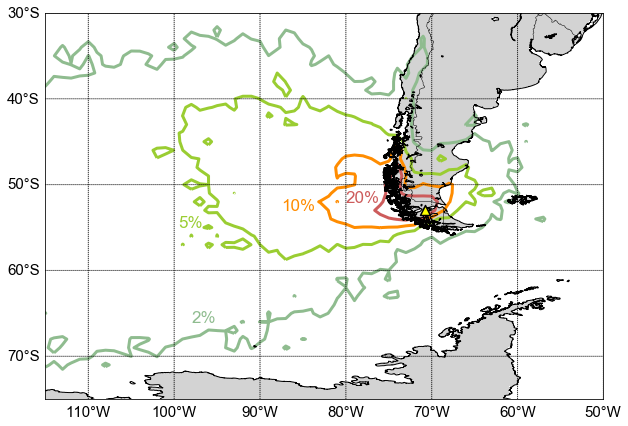

In [22]:
mapcorners = [-115, -75, -50, -30]
standard_pm = None
bmap_params = pysplit.MapDesign(mapcorners,standard_pm,mapcolor=None,latlon_spacing=(10,10),
                                latlon_labelspacing=(10,10),
                                lon_labels=["bottom"], latlon_fs=15,
                                drawoutlines=True,resolution="h",area_threshold=100,
                                zmapbound=100)
bmap = bmap_params.make_basemap()
bmap.drawlsmask(land_color = "#d3d3d3", ocean_color="white")
bmap.scatter(-70.8333,-53.0,marker="^",c="yellow",zorder=20, s=100,edgecolors="black",linewidths=1.5)
plt.contour(X,Y,Z,levels=(2,5,10,20),colors=("darkseagreen","yellowgreen","darkorange","indianred"),linewidths=3)

plt.text(-80,-52,"20%",fontsize=17,color="indianred")
plt.text(-87.5,-53,"10%",fontsize=17,color="darkorange")
plt.text(-99.5,-55,"5%",fontsize=17,color="yellowgreen")
plt.text(-98,-66,"2%",fontsize=17,color="darkseagreen")
plt.savefig("GDAS_used.pdf")

Plot different trajectory cluster for a particular month, for example.

C:\Users\Zhengyu\Anaconda3\lib\site-packages\pysplit\mapdesigner.py:315: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  ax=ax)
C:\Users\Zhengyu\Anaconda3\lib\site-packages\pysplit\mapdesigner.py:327: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  basemap.drawcountries(zorder=self.zborder)


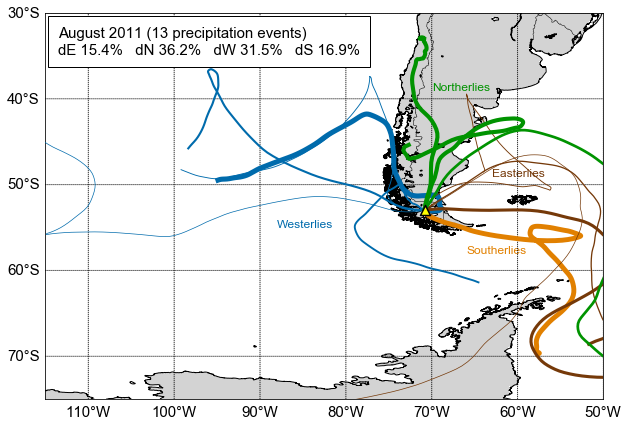

In [185]:
mapcorners = [-115, -75, -50, -30]
standard_pm = None
bmap_params = pysplit.MapDesign(mapcorners, standard_pm, mapcolor = None, latlon_spacing = (10,10),
                                latlon_labelspacing=(10,10),
                                lon_labels=["bottom"], latlon_fs=15,
                                drawoutlines=True,resolution="h",area_threshold=100,
                                zmapbound=111)
bmap = bmap_params.make_basemap()
bmap.drawlsmask(land_color = "#d3d3d3", ocean_color="white")
bmap.scatter(-70.8333,-53.0,marker="^",c="yellow",zorder =500, s = 100,edgecolors="black",linewidths=1.5)

linewidth,j=[1.6,0.2,4.4,0.4,1.4,4.6,2.6,0.4,0.8,0.2,2.2,3.6,3.6],0
for traj,i in zip(trajgroup_used,range(len(cluster_list))):
    if traj.data.DateTime.dt.year[0]==2011:
        if traj.data.DateTime.dt.month[0]==8:
            if cluster_list[i]=="dE":
                bmap.plot(*traj.path.xy,c="#753909",linewidth=linewidth[j]+0.5,zorder=150)
            if cluster_list[i]=="dN":
                bmap.plot(*traj.path.xy,c="#009300",linewidth=linewidth[j]+0.5,zorder=150)
            if cluster_list[i]=="dW":
                bmap.plot(*traj.path.xy,c="#006BAC",linewidth=linewidth[j]+0.5,zorder=150)
            if cluster_list[i]=="dS":
                bmap.plot(*traj.path.xy,c="#E18000",linewidth=linewidth[j]+0.5,zorder=150)
            j=j+1

plt.text(-113.5,-34.75,"August 2011 (13 precipitation events)\ndE 15.4%   dN 36.2%   dW 31.5%   dS 16.9%",
         fontsize=15,backgroundcolor="black",
         bbox=dict(facecolor="white", edgecolor="black", pad=10.0),zorder=1000)
plt.text(-63,-49,"Easterlies",fontsize=12,color="#753909")
plt.text(-70,-39,"Northerlies",fontsize=12,color="#009300")
plt.text(-88,-55,"Westerlies",fontsize=12,color="#006BAC")
plt.text(-66,-58,"Southerlies",fontsize=12,color="#E18000")
plt.savefig("Figure 3.pdf",bbox_inches="tight")

Trajectory cluster boundary

C:\Users\Zhengyu\Anaconda3\lib\site-packages\pysplit\mapdesigner.py:315: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  ax=ax)
C:\Users\Zhengyu\Anaconda3\lib\site-packages\pysplit\mapdesigner.py:327: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  basemap.drawcountries(zorder=self.zborder)


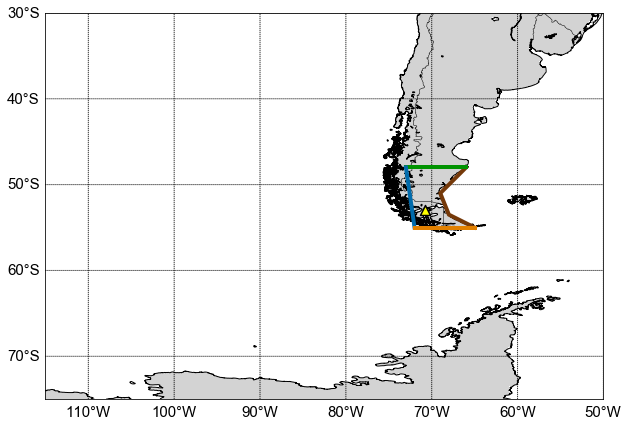

In [11]:
mapcorners = [-115, -75, -50, -30]
standard_pm = None
bmap_params = pysplit.MapDesign(mapcorners, standard_pm, mapcolor = None, latlon_spacing = (10,10),
                                latlon_labelspacing=(10,10),
                                lon_labels=["bottom"], latlon_fs=15,
                                drawoutlines=True,resolution="h",area_threshold=100,
                                zmapbound=111)
bmap = bmap_params.make_basemap()
bmap.drawlsmask(land_color = "#d3d3d3", ocean_color="white")
bmap.scatter(-70.8333,-53.0,marker="^",c="yellow",zorder =500, s = 100,edgecolors="black",linewidths=1.5)
bmap.plot([-66,-69,-68,-65],[-48,-51,-53.5,-55],color="#753909",linewidth=4,zorder=100)
bmap.plot([-73,-66],[-48,-48],color="#009300",linewidth=4,zorder=100)
bmap.plot([-72,-73],[-55,-48],color="#006BAC",linewidth=4,zorder=100)
bmap.plot([-65,-72],[-55,-55],color="#E18000",linewidth=4,zorder=100)      
plt.savefig("base.pdf")

Along-trajectory pecific humidity and rainfall rate analysis

create lists for cluster-specific used trajectory groups

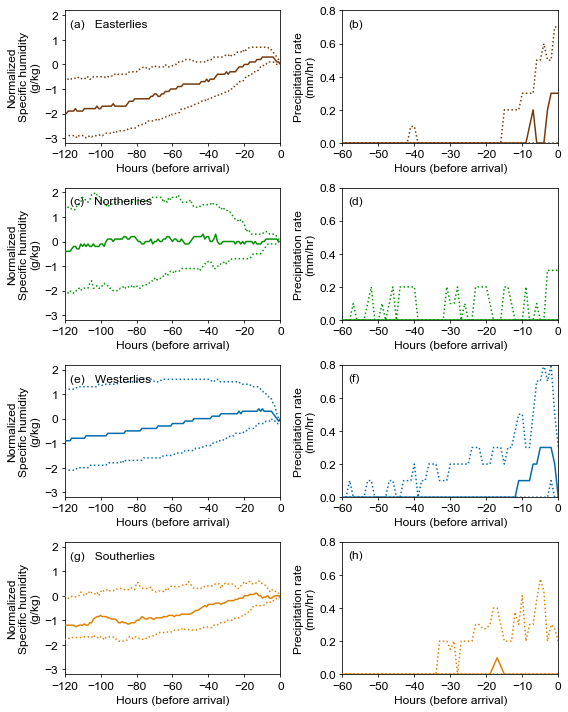

In [170]:
trajgroup_used_dE,trajgroup_used_dN,trajgroup_used_dW,trajgroup_used_dS=[],[],[],[]
for traj,i in zip(trajgroup_used,range(len(cluster_list))):
    if cluster_list[i]=="dE":
        trajgroup_used_dE.append(traj)
    if cluster_list[i]=="dN":
        trajgroup_used_dN.append(traj)
    if cluster_list[i]=="dW":
        trajgroup_used_dW.append(traj)
    if cluster_list[i]=="dS":
        trajgroup_used_dS.append(traj)
    
def get_percentile_SH(trajgroup,perc):
    SH=[]
    for hr in range(-120,1,1):
        SH_list=[]
        for traj in trajgroup:
            SH_list.append(traj.data.Specific_Humidity[hr]-traj.data.Specific_Humidity[0])
            # normalized to t=0; relative specific humidity changes
        SH.append(np.quantile(SH_list,perc))
    return(SH)
def get_percentile_RR(trajgroup,perc):
    RR=[]
    for hr in range(-120,1,1):
        RR_list=[]
        for traj in trajgroup:
            RR_list.append(traj.data.Rainfall[hr])
        RR.append(np.quantile(RR_list,perc))
    return(RR)

plt.figure(figsize=(8,10))
def plot_SH(cluster,c):
    plt.plot(range(-120,1,1),get_percentile_SH(cluster,0.5),color=c,zorder=20)
    plt.plot(range(-120,1,1),get_percentile_SH(cluster,0.25),color=c,linestyle="dotted",zorder=10)
    plt.plot(range(-120,1,1),get_percentile_SH(cluster,0.75),color=c,linestyle="dotted",zorder=10)
    plt.xlabel("Hours (before arrival)",fontsize=12)
    plt.ylabel("Normalized\nSpecific humidity\n(g/kg)",fontsize=12)
    plt.tick_params(axis="both",which="major",labelsize=12,length=3)
    plt.xlim(xmin=-120,xmax=0)
    plt.xticks(range(-120,20,20))
    plt.ylim(ymin=-3.2,ymax=2.2)
    plt.yticks(range(-3,3,1))
def plot_RR(cluster,c):
    plt.plot(range(-120,1,1),get_percentile_RR(cluster,0.5),color=c,zorder=20)
    plt.plot(range(-120,1,1),get_percentile_RR(cluster,0.25),color=c,linestyle="dotted",zorder=10)
    plt.plot(range(-120,1,1),get_percentile_RR(cluster,0.75),color=c,linestyle="dotted",zorder=10)
    plt.xlabel("Hours (before arrival)",fontsize=12)
    plt.ylabel("Precipitation rate\n(mm/hr)",fontsize=12)
    plt.tick_params(axis="both",which="major",labelsize=12,length=3)
    plt.xlim(xmin=-60,xmax=0)
    plt.xticks(range(-60,10,10))
    plt.ylim(ymin=0,ymax=0.8)

plt.subplot(4,2,1)
plot_SH(trajgroup_used_dE,"#753909")
plt.text(-117,1.5,"(a)   Easterlies",fontsize=12,zorder=50)
plt.subplot(4,2,2)
plot_RR(trajgroup_used_dE,"#753909")
plt.text(-58.5,0.7,"(b)",fontsize=12)
plt.subplot(4,2,3)
plot_SH(trajgroup_used_dN,"#009300")
plt.text(-117,1.5,"(c)   Northerlies",fontsize=12,zorder=50)
plt.subplot(4,2,4)
plot_RR(trajgroup_used_dN,"#009300")
plt.text(-58.5,0.7,"(d)",fontsize=12)
plt.subplot(4,2,5)
plot_SH(trajgroup_used_dW,"#006BAC")
plt.text(-117,1.5,"(e)   Westerlies",fontsize=12,zorder=50)
plt.subplot(4,2,6)
plot_RR(trajgroup_used_dW,"#006BAC")
plt.text(-58.5,0.7,"(f)",fontsize=12)
plt.subplot(4,2,7)
plot_SH(trajgroup_used_dS,"#E18000")
plt.text(-117,1.5,"(g)   Southerlies",fontsize=12,zorder=50)
plt.subplot(4,2,8)
plot_RR(trajgroup_used_dS,"#E18000")
plt.text(-58.5,0.7,"(h)",fontsize=12)

plt.tight_layout(w_pad=1,h_pad=1)
plt.savefig("Figure 6.pdf",bbox_inches="tight")

Extreme event analysis

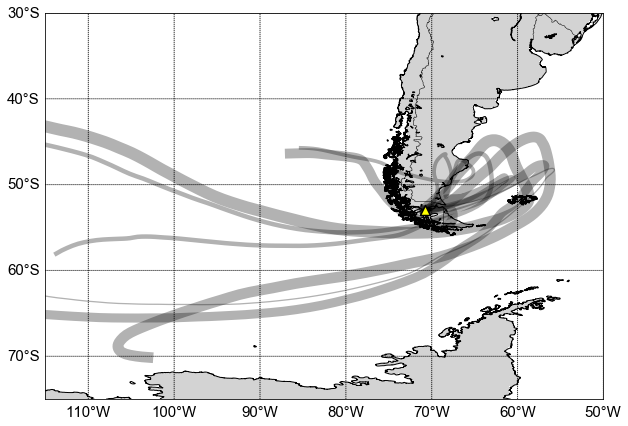

In [78]:
cluster_ext=[]
for traj in trajgroup_used:
    if traj.data.DateTime.dt.year[0]==2012:
        if traj.data.DateTime.dt.month[0]==3 and traj.data.DateTime.dt.day[0]==11 and traj.data.DateTime.dt.hour[0] in [12,18]:
            cluster_ext.append(traj)
        if traj.data.DateTime.dt.month[0]==3 and traj.data.DateTime.dt.day[0]==12:
            cluster_ext.append(traj)
        if traj.data.DateTime.dt.month[0]==3 and traj.data.DateTime.dt.day[0]==13 and traj.data.DateTime.dt.hour[0] in [0,6]:
            cluster_ext.append(traj)
mapcorners = [-115, -75, -50, -30]
standard_pm = None
bmap_params = pysplit.MapDesign(mapcorners, standard_pm, mapcolor = None, latlon_spacing = (10,10),
                                latlon_labelspacing=(10,10),
                                lon_labels=["bottom"], latlon_fs=15,
                                drawoutlines=True,resolution="h",area_threshold=100,
                                zmapbound=111)
bmap = bmap_params.make_basemap()
bmap.drawlsmask(land_color = "#d3d3d3", ocean_color="white")
bmap.scatter(-70.8333,-53.0,marker="^",c="yellow",zorder =500, s = 100,edgecolors="black",linewidths=1.5)
i=32422

for traj in cluster_ext:
    bmap.plot(*traj.path.xy,c="black",linewidth=(df_precipitation["6hr precipitation"][i]+0.5),zorder=150,alpha=0.3)
    i=i+1
plt.plot()
plt.savefig("extreme_new.pdf",bbox_inches="tight")

Histogram visualization

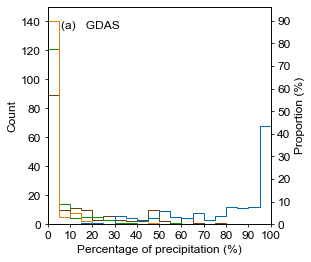

In [192]:
fig, ax1 = plt.subplots(figsize=(4,4))
ax2 = ax1.twinx()
def plot_hist(cluster,c):    
    ax1.hist(df_results[cluster],bins=range(0,105,5),histtype="step",alpha=1,color=c)
plot_hist("dE%","#753909")
plot_hist("dN%","#009300")
plot_hist("dW%","#006BAC")
plot_hist("dS%","#E18000")
ax1.set_xlabel("Percentage of precipitation (%)",fontsize=12)
ax1.set_ylabel("Count",fontsize=12)
ax1.tick_params(axis="both",which="major",labelsize=12,length=3)
ax1.set_ylim(ymin=0,ymax=150)
ax1.set_xlim(xmin=0,xmax=100)
ax1.set_xticks(range(0,110,10))
ax2.set_ylim(ymin=0,ymax=96.154)
ax2.set_yticks(range(0,100,10))
ax2.tick_params(axis="both",which="major",labelsize=12,length=3)
ax2.set_ylabel("Proportion (%)",fontsize=12)
ax1.text(6,135,"(a)   GDAS",fontsize=12,zorder=50)
plt.savefig("hist1.pdf",bbox_inches="tight")

Cumulative precipitation plot

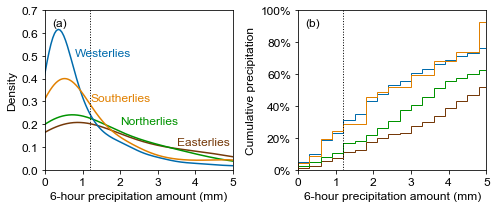

In [188]:
plt.figure(figsize=(7,3))
df_precip_GDAS=df_precip[df_precip["year"]>=2005].reset_index(drop=True)

def plot_amount_hist(cluster):
    dE_hist,dN_hist,dW_hist,dS_hist=[],[],[],[]
    for i in range(len(cluster)):
        if cluster[i]=="dE":
            dE_hist.append(df_precip_GDAS["6hr precipitation"][i])
        if cluster[i]=="dN":
            dN_hist.append(df_precip_GDAS["6hr precipitation"][i])
        if cluster[i]=="dW":
            dW_hist.append(df_precip_GDAS["6hr precipitation"][i])
        if cluster[i]=="dS":
            dS_hist.append(df_precip_GDAS["6hr precipitation"][i])
    ax1 = pd.Series(dE_hist).plot.kde(fontsize = 12,color="#753909")
    ax1 = pd.Series(dN_hist).plot.kde(fontsize = 12,color="#009300")
    ax1 = pd.Series(dW_hist).plot.kde(fontsize = 12,color="#006BAC")
    ax1 = pd.Series(dS_hist).plot.kde(fontsize = 12,color="#E18000")

plt.subplot(1,2,1)
plot_amount_hist(cluster_list)
plt.plot([1.2,1.2],[0,1],color="black",linewidth=1,linestyle="dotted")
plt.xlim(xmin=0,xmax=5)
plt.ylim(ymin=0,ymax=0.7)
plt.xlabel("6-hour precipitation amount (mm)",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.text(0.2,0.63,"(a)",fontsize=12)
plt.text(3.5,0.11,"Easterlies",fontsize=12,color="#753909")
plt.text(2,0.2,"Northerlies",fontsize=12,color="#009300")
plt.text(0.8,0.5,"Westerlies",fontsize=12,color="#006BAC")
plt.text(1.2,0.3,"Southerlies",fontsize=12,color="#E18000")

def plot_cumu_hist(cluster):
    dE_hist,dN_hist,dW_hist,dS_hist=[],[],[],[]
    for i in range(len(cluster)):
        if cluster[i]=="dE":
            dE_hist.append(df_precip_GDAS["6hr precipitation"][i])
        if cluster[i]=="dN":
            dN_hist.append(df_precip_GDAS["6hr precipitation"][i])
        if cluster[i]=="dW":
            dW_hist.append(df_precip_GDAS["6hr precipitation"][i])
        if cluster[i]=="dS":
            dS_hist.append(df_precip_GDAS["6hr precipitation"][i])
    ax2 = pd.Series(dE_hist).plot.hist(fontsize = 12,color="#753909",cumulative=True,weights=dE_hist,density=True,
                                       bins=np.arange(0,100,0.3),histtype="step")
    ax2 = pd.Series(dN_hist).plot.hist(fontsize = 12,color="#009300",cumulative=True,weights=dN_hist,density=True,
                                       bins=np.arange(0,100,0.3),histtype="step")
    ax2 = pd.Series(dW_hist).plot.hist(fontsize = 12,color="#006BAC",cumulative=True,weights=dW_hist,density=True,
                                       bins=np.arange(0,100,0.3),histtype="step")
    ax2 = pd.Series(dS_hist).plot.hist(fontsize = 12,color="#E18000",cumulative=True,weights=dS_hist,density=True,
                                       bins=np.arange(0,100,0.3),histtype="step")
plt.subplot(1,2,2)
plot_cumu_hist(cluster_list)
plt.plot([1.2,1.2],[0,1],color="black",linewidth=1,linestyle="dotted")
plt.xlim(xmin=0,xmax=5)
plt.ylim(ymin=0,ymax=1)
plt.yticks([0,0.2,0.4,0.6,0.8,1],labels=["0%","20%","40%","60%","80%","100%"])
plt.xlabel("6-hour precipitation amount (mm)",fontsize=12)
plt.ylabel("Cumulative precipitation",fontsize=12)
plt.text(0.2,0.9,"(b)",fontsize=12)
plt.tight_layout(w_pad=1)
plt.savefig("density_GDAS.pdf",bbox_inches="tight")

In [180]:
print(df_results.to_string())

     year  month        dE%        dN%         dW%        dS%
0    2005      1   0.000000   0.000000  100.000000   0.000000
1    2005      2   0.000000   0.000000  100.000000   0.000000
2    2005      3  11.076923   4.307692   84.615385   0.000000
3    2005      4  13.959391  10.406091   75.634518   0.000000
4    2005      5   9.841270  19.365079   70.476190   0.317460
5    2005      6   9.160305   6.870229   82.442748   1.526718
6    2005      7   0.000000  15.789474   84.210526   0.000000
7    2005      8  46.153846   2.714932   50.678733   0.452489
8    2005      9   8.000000  28.000000   64.000000   0.000000
9    2005     10   3.012048   0.000000   96.987952   0.000000
10   2005     11   0.000000   0.000000  100.000000   0.000000
11   2005     12   0.000000   9.090909   90.909091   0.000000
12   2006      1   0.000000   0.000000   97.002725   2.997275
13   2006      2   0.000000   0.000000  100.000000   0.000000
14   2006      3   0.000000   0.000000  100.000000   0.000000
15   200